# Chapter 6: Exploratory Data Analysis (EDA)

## Table of Contents
<br>

<a href="#Module 6: Exploratory Data Analysis"><font size="+1">Module 6: Exploratory Data Analysis</font></a>
<ol>
  <li>What is EDA?</li>
  <li>Corpus Linguistics for EDA</li>
  <li>Corpus Linguistics - Method 1: Word Frequency Analysis</li>
  <li>Corpus Linguistics - Method 2: Concordance</li>
  <li>Corpus Linguistics - Method 3: Collocation</li>
  <li>Corpus Linguistics - Method 4: Keyness</li>
  <li>kmeans</li>
</ol>

**Learning Outcomes:** 


* Describe the 4 key techniques in corpus linguitics
* Extract raw frequencies, concodance, collocations and keyness from the corpus under study
* Calculate lexical diversity.
* View lexical dispersion on selected tokens
* List the benefits that corncordance tools can bring to linguistics analysis
* View exical dispersion on selected tokens
* Execute kmeans clustering on text column in dataframe.

<br>

In [ ]:
# Import libraries used
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.data.path.append("../pre_course/nltk_data")
from collections import Counter
from nltk import ngrams
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import collections

### 6.1 What is EDA?

As the name suggests, you’re exploring – looking for clues!

Tukey (1977) calls it: “*detective work*”

For example:

<ul>
  <li>Establishing the data’s underlying structure</li>
  <li>Identifying mistakes and missing data</li>
  <li>Establishing the key variables</li>
  <li>Establishing the data’s underlying structure</li>
  <li>Spotting anomalies</li>
  <li>Checking assumptions and testing hypotheses in relation to a specific model</li>   
</ul>


The above analysis is done to:


<ul>
  <li>Discover Patterns</li>
  <li>Spot Anomalies</li>
  <li>Frame Hypothesis</li>
  <li>Check Assumptions</li>
</ul>


EDA is used in conjuction with **Confirmatory Data Analysis** where you evaluate your evidence using traditional statistical tools such as significance, inference, and confidence.


Which one of the following tasks could be designated as EDA activity ?

<ul>
  <li>Get a feel of the data, describe the data, look at a sample of data like first and last rows</li>
  <li>Perform data profiling (informative summaries about the data eg mean, median, mode)</li>
  <li>Define the feature variables that can potentially be used for machine learning</li>
  <li>Recognise the challenges posed by data - missing values, outliers</li>
  <li>Examine key words in context, most frequently occuring words</li>
  <li>Perform cluster analysis to determine how linguistic features are related</li>
  <li>Apply methods to uncover topics in the text</li>  
  <li>Hypothesis/significance testing</li>
  <li>Regresssion/Variance Analysis</li>   
</ul>

**Key terms**

An **N-gram means** a sequence of N words. They are extensively used in natural language processing tasks. They are set of co-occurring words within a given window and when computing the n-grams you typically move one word forward. 

For example, “*The cow jumps over the moon*”. If N=2 (known as bigrams), then the ngrams would be:

<ul>
  <li>the cow</li>
  <li>cow jumps</li>
  <li>jumps over</li>
</ul>

If N=3, the n-grams would be:


<ul>
  <li>the cow jumps</li>
  <li>cow jumps over</li>
  <li>jumps over the</li>
</ul>


More in Module 6 Feature Representations

### 6.2 Corpus Linguistics for EDA

Corpus linguistics is a field which focuses upon a set of methods, for studying language.

It is the **scientific study of language on the basis of text corpora.** 

It is not a monolithic, consensually agreed set of methods and procedures. 

It is a heterogeneous field – although there are some basic generalisations that we can make.

Corpus linguistics invloves gathering a **corpus** (homogenuous, of a particular genre).

A corpus (plural corpora) is a **collection of texts** used for linguistic analyses.

Such corpora generally comprise hundreds of thousands to billions of words and are not made up of the linguist’s or a native speaker’s invented examples but based on **authentic naturally occurring spoken or written usage.**

<br>


**Types of corpora and some famous (English) examples**

*Balanced, representative* <br>
Texts selected in pre-defined proportions to mirror a particular language or language variety.<br>
Examples:
BNC: British National Corpus <br>
<ul>
  <li>100 m words, 10% spoken</li>
  <li>Carefully composed to be ‘balanced’</li>
</ul>

*Monitor* <br>
New texts added by and by to ‘monitor’ language change.<br>
Examples:<br>
BoE: Bank of English 
<ul>
  <li>Written and spoken, much newspaper/media language</li>
  <li>Different varieties and text categories</li>
  <li>Part can be searched online</li>
</ul>


*Parallel (translation)* <br>
Same texts in two (or more) languages <br>
Examples:<br>
OPUS open source parallel corpus 
<ul>
  <li>Access to aligned corpora, mainly EU texts.</li>
  <li>Unknown size</li>
</ul>


*Comparable* <br>
Similar texts in two, or more, languages or language varieties <br>
Examples:<br>
ICE: International Corpus of English 
<ul>
  <li>Different varieties of English (British, Irish, EastAfrican, etc)</li>
  <li>50% spoken</li>
  <li>Some freely available</li>
</ul>


*Diachronic* <br>
Include texts from different (consecutive) periods, preferable comparable ones <br>
Examples: <br>
Helsinki Corpus of English Texts <br>
<ul>
  <li>Old, Middle, and Early Modern English</li>
  <li>Text samples</li>
</ul>

<br>

**Typically 4 Key methods are used in Corpus Linguistics**

<ul>
  <li>Word Frequency Analysis </li>
  <li>Concordance</li>
  <li>Collocation</li>
  <li>Keyness</li>
</ul>


**Key terms**

<ul>
  <li>Types: Number of distinct words in a corpus (size of the voabulary)</li>
  <li>Tokens: Number of running words</li>
</ul>
<br>


"*They picnicked by the wadi, then lay back on the sand and looked at the stars*"

- 16 word tokens, 14 word types (not counting punctuation)



### 6.3 Corpus Linguistics - Method 1: Word Frequency Analysis

Word Frequency: A simple tallying of the number of instances of something that occurs in a corpus


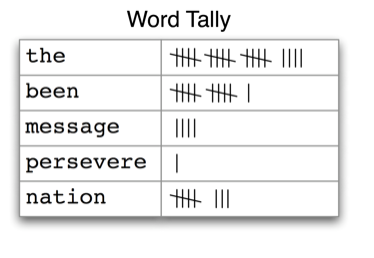


**Zipf’s Law**

Zipf noticed that the second most common word ‘*of*’ occurs about half as often as the most common word ‘*the*’. While the third most common word ‘*to*’ occurs about a third as often as ‘*the*’. And so on.

Generally, the frequency of the *nth* most common word is about *1/n* times the frequency of the most common word.
So a graph of the frequencies of the most common words looks roughly like this:


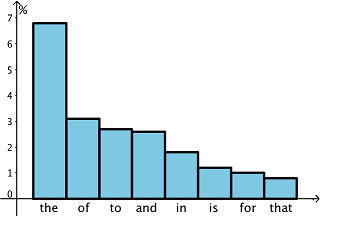


Language after language, corpus after corpus, linguistic type after linguistic type, . . . we observe the same “*few giants, many dwarves*” pattern.
<br>

**Normalised Frequency**

The most basic statistical measure is a frequency count, as shown above. 

There are 1,103 examples of the word *Lancaster* in the written section of the BNC.

This maybe expressed as a percentage of the whole corpus; the BNC’s written section contains **87,903,571** words of running text, meaning that the word *Lancaster* represents 0.013% of the total data in the written section of the corpus. 

The percentage is just another way of looking at the count 1,103 in context, to try to make sense of it **relative to the totality of the written corpus**.

Sometimes, as is the case here, the percentage may not convey meaningfully the frequency of use of the word, so we might instead produce a **normalised frequency (or relative frequency)**, which answers the question "**how often might we assume we will see the word per x words of running text?**"

Normalised frequencies are usually given **per thousand words or per million words.**

(McEnery and Hardie, 2012)



$$Normalized~freq = (\frac{raw~freq}{token~number}) \times common~base$$


Import Data (Spam/Ham Dataset) https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research.

It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

In [ ]:
spamham_data = pd.read_csv("../data/SMSSpamCollection.csv", encoding='iso-8859-1') 

In [ ]:
spamham_data.head()

In [ ]:
spamham_data["Email"].value_counts().plot(kind='pie',
                                          explode=[0, 0.1],
                                          figsize=(6,6),
                                          autopct='%1.1f%%',
                                          shadow=True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
# Some utility preprocessing functions for use later.

def remove_punct(ptext):
    
    for each_punctuation_mark in string.punctuation:
        ptext = ptext.replace(each_punctuation_mark, "")
        
    return ptext


stop_words = set(stopwords.words('english'))


def clean_stopwords(token):
    return [item for item in token if item not in stop_words]


def return_tostring(token):
    return " ".join (token)


In [ ]:
spamham_data["Description"]

In [ ]:
# Get tokens in description column
results = Counter()
spamham_data["Description"].str.lower().str.split().apply(results.update)
print("Tokens:", sum(dict(results).values()))

In [ ]:
# Lowercase the Description data
spamham_data["Description"] = spamham_data["Description"].str.lower()

In [ ]:
# Remove punctuation
spamham_data['Description'] = spamham_data['Description'].apply(remove_punct)

In [ ]:
# Tokenise in a basic mannder
spamham_data["Description"] = spamham_data["Description"].str.split(" ")

In [ ]:
# Remove stopwords
spamham_data['Description'] = spamham_data['Description'].apply(clean_stopwords)

In [ ]:
spamham_data['Description']

In [ ]:
#word count
alltext = []
for item in spamham_data['Description']:
    item = list(filter(None, item))
    alltext.extend(item)

In [ ]:
counter = collections.Counter(alltext)
print(counter)

In [ ]:
sort_order = sorted(dict(counter).items(), key=lambda x: x[1], reverse=True)
token = []
count = []
for i in sort_order:
    token.append(i[0])
    count.append(i[1])

In [ ]:
def plotall(px, py):
    
    plt.xticks(fontsize=12, rotation=90)
    plt.ylabel('Frequency')
    plt.plot(px, py)
    plt.show()

In [ ]:
plotall(token[:10], count[:10])

In [ ]:
# Return lists to strings
spamham_data['Description'] = spamham_data['Description'].apply(return_tostring)

In [ ]:
spamham_data['Description'].head()

We can make a wordcloud for the description column

The description column is concatenated (joined) into one big string called text first.

In [ ]:
# Join all the text data
text = " ".join(spamham_data['Description'])

# The text string is then passed to the wordcloud function:
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Sort dictionary items in descending order by value
sort_orders = sorted(dict(results).items(), 
                     key=lambda x: x[1], 
                     reverse=True)

In [ ]:
# Get the first 20 items
sort_orders = sort_orders[0:50]

# Seperate out word types from counts
word_type_list = [item[0] for item in sort_orders]
word_type_count_list = [item[1] for item in sort_orders]

In [ ]:
# Show zipf's law in action
plotall(word_type_list, word_type_count_list)

In [ ]:
# Get the word types
unique_words = set()
spamham_data["Description"].str.lower().str.split().apply(unique_words.update)
print("Word Types:", len(unique_words))

In [ ]:
spamham_data.head()

In [ ]:
# to retrieve ham emails, you can begin like ths.

ham = spamham_data.loc[spamham_data['Email']=='ham']

In [ ]:
ham.head()

In [ ]:
# Write your code below


**Measure Lexical Diversity**

<br>


Lexical Diversity is “**the range of different words used in a text, with a greater range indicating a higher diversity**” 
A greater range indicates a higher diversity.

Imagine a text which keeps repeating the same few words again and again – for example: *‘manager‘, ‘thinks‘ and ‘finishes‘*.

Compare this with a text which avoids that sort of repetition, and instead uses different vocabulary for the same ideas, *‘manager, boss, chief, head, leader‘, ‘thinks, deliberates, ponders, reflects‘.*

The second text is likely to be more complex and more difficult to model. 

It is said to have more **‘Lexical diversity’** than the first text, and this is why Lexical Diversity (LD) is thought to be an important measure of text difficulty.

**Type Token Ratio:** the number of different words (types) / all words produced (tokens)

$$TTR = \frac{\# ~types}{\# ~tokens}$$

It maybe useful to know difference in LD between ham and spam text

In [ ]:
# Join all the data into one string to analyse the whole corpus
all_ham_text = " ".join(list(ham['Description']))

In [ ]:
all_ham_text

In [ ]:
# LD for ham
total_token_ham = all_ham_text.split(" ")
total_wordtype_ham = set(total_token_ham)

print("Lexical Diversity for ham:", len(total_wordtype_ham)/len(total_token_ham ))

**Measure Lexical Dispersion**

<br>

The location of a word can be determined. It can be established for example how many words from the beginning it appears. 

This positional information can be displayed using a **dispersion plot**. Each stripe represents an instance of a word, and each row represents the entire text.

In [ ]:
# Dispersion
# Tokenise the data
ham_text_tokens = nltk.word_tokenize(all_ham_text) 

In [ ]:
ham_text_object = nltk.Text(ham_text_tokens) #turning it into nltk.Text object to be able to use .condordance, .similar etc
ham_text_object.dispersion_plot(["call", "service", "text"])

### 6.4 Corpus Linguistics - Method 2: Concordance

The frequency count of types that we did above is useful to a certain extent.

In order to see what the frequency is all about we need to look at the types in **context**, that is, we need to make a concordance of the type in question. Making a concordance will put the word in the middle and show you what the surrounding text looks like. 

Also known as **keyword in context or KWIC**. 

In [ ]:
ham_text_object.concordance('later')

### 6.5 Corpus Linguistics - Method 3: Collocation

Words tend to appear in typical, recurrent combinations:


<ul>
  <li>day and night</li>
  <li>ring and bell </li>
  <li>milk and cow</li>
  <li>kick and bucket</li>
  <li>brush and teeth </li>
  <li>milk and cow</li>
</ul>

The above are known as **collocations**

The meaning of a word is in part determined by its characteristic.

Empirically, collocations are words that have a tendency to occur near each other. 

Words do not randomly appear together. Some of those co-occurrence are extremely consistent and bear meaning with them. 

Collocation are important for us to look at when we study language, and it’s really the mass observation of co-occurrence in corpus data that allows us to begin to measure the extent to which words are coming together in order to form meaning.


In [ ]:

def generate_collocations(tokens):
    '''
    Given list of tokens, return collocations.
    '''
    ignored_words = nltk.corpus.stopwords.words('english')
    
    bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
    bigramFinder.apply_word_filter(lambda word: len(word) < 3 or word.lower() in ignored_words)
    
    bigram_freq = bigramFinder.ngram_fd.items()
    
    bigramFreqTable = (pd.DataFrame(list(bigram_freq), columns=['bigram','freq'])
                       .sort_values(by='freq', ascending=False))
   
    return bigramFreqTable


In [ ]:
generate_collocations(ham_text_tokens).head(50)

### 6.6 Corpus Linguistics - Method 4: Keyness

Keywords are those whose frequency is unusually high in comparison with some norm.

In order to identify significant differences between 2 corpora or 2 parts of a corpus , we often use a statistical measure called **keyness**.

Imagine two highly simplified corpora. Each contains only 3 different words *cat, dog, and cow* and has a total of 100 words. 

The frequency counts are as follows:

**Corpus A: cat 52; dog 17; cow 31** 

**Corpus B: cat 19; dog 40; cow 31** 

*Cat* and *dog* would be key, as they are distributed differently across the corpora, but cow would not as its distribution is the same. 

Put another way, cat and dog are distinguishing features of the corpora; cow is not.

Normally, we use a concordancing program like **AntConc or WordSmith** to calculate keyness for us.

While we can let these programs do the mathematical heavy lifting, it’s important that we have a basic understanding of what these calculations are and what exactly they tell us.

There are 2 common methods for calculating distributional differences: a chi-squared test ( or χ² test) and log-likelihood.

##### Exercises
<br>

<ol>
  <li>Import the Hep Dataset and perform EDA as outlined below to the text column.</li>
    
    
  <li>              Plot the top 10 highest frequency words. </li>
  <li>              Calculate the normalised frequency for top 10 most frequently occurring words. </li>
  <li>             Create a word cloud for the top 100 words (in terms of frequency) </li>
  <li>              Calculate the lexical diversity for the text  </li>
  <li>              Show keyword in context for the top 10 words. </li>
  <li>              Generate collocations </li>

     
</ol>




#### References



https://www.cambridge.org/core/books/corpus-linguistics/16CC177EA9B6007B3187C64326F818AB